## No rooted-out branching - Method 2

In [1]:
%run imports.py

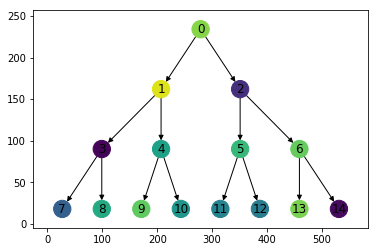

In [2]:
G = nx.balanced_tree(create_using=nx.DiGraph(), h=3, r=2)
N = nx.number_of_nodes(G)
layout = graphviz_layout(G, prog='dot')
#init = np.random.normal(loc=0, scale=4, size=N)
init = np.random.rand(N)
nx.draw_networkx(G, pos=layout, node_color=init, vmin=0, vmax=1)

Find root, $r$

In [3]:
root = [n for n,d in G.in_degree() if d==0][0]
root

0

Children of root, $\{ c_0, c_1 \}$

In [4]:
c = [n for n in G.neighbors(root)]
c

[1, 2]

Reverse the direction of an edge not connected to the root

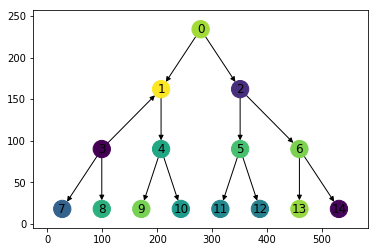

In [5]:
G.remove_edge(1, 3)
G.add_edge(3,1)
nx.draw_networkx(G, pos=layout, node_color=init)

Simulate simple consensus

In [6]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

7

In [7]:
from scipy.integrate import solve_ivp

In [8]:
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,10], y0=init)

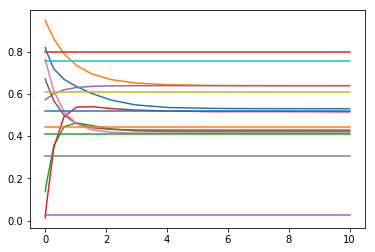

In [9]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [10]:
res1.y[:,-1]

array([0.52958378, 0.63851709, 0.42063165, 0.51476073, 0.63850559,
       0.42815193, 0.41311311, 0.30327574, 0.60851645, 0.75616701,
       0.52084421, 0.44432986, 0.41197383, 0.80040296, 0.02582302])

### Symmetrization

In [11]:
from scipy.linalg import null_space
from scipy.linalg import solve_lyapunov

In [12]:
Q = null_space(null_space(L).transpose()).transpose()
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [13]:
f2 = lambda t,x: -eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,10], y0=init)

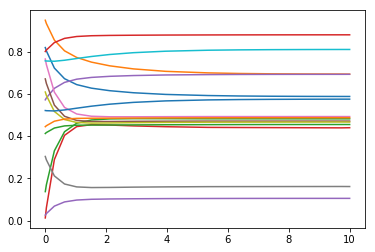

In [14]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

Create undirected graph from the equivalent Laplacian

In [15]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [16]:
nx.is_connected(eqG)

True

In [17]:
np.sum(eqL, axis=1)

array([-5.23886490e-16,  6.53990750e-16,  6.80011603e-16, -1.56558794e-16,
       -1.19099609e-16, -2.02268757e-15, -4.44089210e-16, -3.12250226e-17,
        6.07153217e-17, -1.66262403e-16, -3.26344854e-17,  9.48026380e-16,
        8.68662781e-16,  1.66533454e-16,  5.55111512e-17])

In [18]:
np.diag(eqL)

array([1.50112433, 1.0918046 , 1.6815734 , 2.29882565, 1.70463681,
       1.59144374, 1.59144374, 0.25542507, 0.25542507, 0.34159823,
       0.34159823, 0.33627528, 0.33627528, 0.33627528, 0.33627528])

In [19]:
res2.y[:,-1]

array([0.58741707, 0.69328463, 0.4815374 , 0.43943368, 0.69242226,
       0.4708581 , 0.49221525, 0.16088234, 0.46612305, 0.81002981,
       0.574707  , 0.48697371, 0.45461768, 0.8794428 , 0.10486286])

Final result

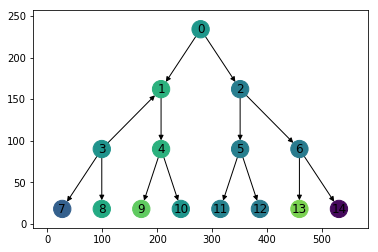

In [20]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout, vmin=0, vmax=1)

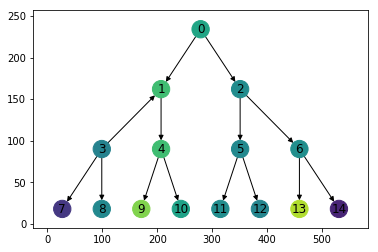

In [21]:
nx.draw_networkx(G, node_color = res2.y[:,-1], pos=layout, vmin=0, vmax=1)

In [22]:
np.linalg.matrix_rank(eqL)

7